In [61]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv("D:\excelR\Simple_linear_regression\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data visualization 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Text(0.5, 1.0, 'Line plot of Delivery Time, Sorting Time')

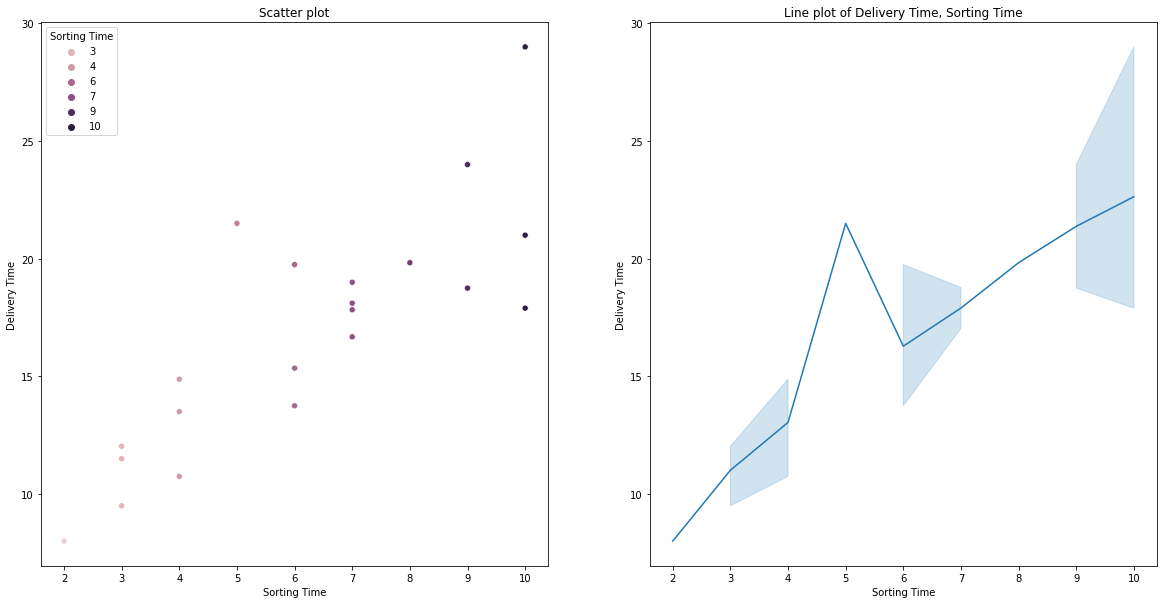

In [28]:
# Scatterplot & Line plots
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="Sorting Time", y="Delivery Time", hue="Sorting Time")
plt.title("Scatter plot")
plt.subplot(1,2,2)
sns.lineplot(data=df, x="Sorting Time", y="Delivery Time")
plt.title("Line plot of Delivery Time, Sorting Time")

<AxesSubplot:>

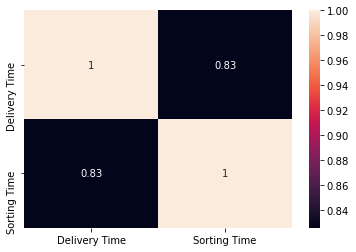

In [29]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

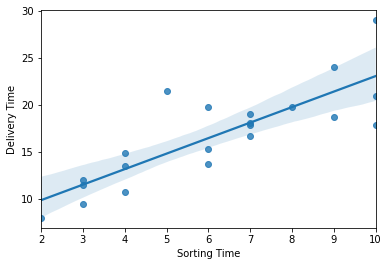

In [30]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

In [36]:
df1=df.rename(columns={"Delivery Time":"deltime", "Sorting Time":"st"})

# Model Building



In [81]:
import statsmodels.formula.api as smf
model=smf.ols("deltime~st",data=df1).fit()

In [83]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deltime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        13:06:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [93]:
pred = model.predict(df1)# predicted values of delivery time using model
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [92]:
pred.corr(df1.deltime) # 0.82

0.8259972607955325

Text(0, 0.5, 'deliverytime')

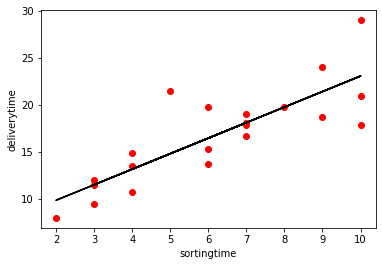

In [95]:
plt.scatter(x=df1['st'],y=df1['deltime'],color='red');plt.plot(df1['st'],pred,color='black');plt.xlabel('sortingtime');plt.ylabel('deliverytime')

In [96]:
# Transforming variables for accuracy
model2 = smf.ols('deltime~np.log(st)',data=df1).fit()
model2.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [97]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deltime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           2.64e-06
Time:                        13:18:31   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
print(model2.conf_int(0.01)) # 99% confidence level

                   0          1
Intercept  -5.862666   8.182033
np.log(st)  5.115458  12.971369


In [99]:
pred2 = model2.predict(pd.DataFrame(df1['st']))
pred2.corr(df1.deltime)

0.8339325279256244

Text(0, 0.5, 'Actual')

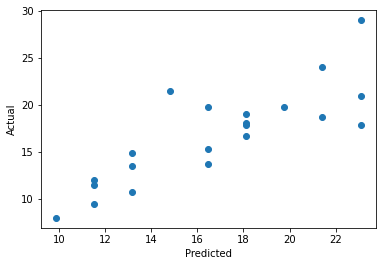

In [102]:
plt.scatter(x=pred,y=df1.deltime);plt.xlabel("Predicted");plt.ylabel("Actual")

In [109]:
data=[df1.deltime,pred2]
data

[0     21.00
 1     13.50
 2     19.75
 3     24.00
 4     29.00
 5     15.35
 6     19.00
 7      9.50
 8     17.90
 9     18.75
 10    19.83
 11    10.75
 12    16.68
 13    11.50
 14    12.03
 15    14.88
 16    13.75
 17    18.11
 18     8.00
 19    17.83
 20    21.50
 Name: deltime, dtype: float64,
 0     21.982913
 1     13.696517
 2     17.363305
 3     21.030094
 4     21.982913
 5     17.363305
 6     18.757354
 7     11.094889
 8     21.982913
 9     21.030094
 10    19.964933
 11    13.696517
 12    18.757354
 13    11.094889
 14    11.094889
 15    13.696517
 16    17.363305
 17    18.757354
 18     7.428100
 19    18.757354
 20    15.714496
 dtype: float64]

In [110]:
res = pd.DataFrame({'Actuals':data[0], 'Predicted':data[1]})

In [111]:
res

,Actuals,Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


<AxesSubplot:>

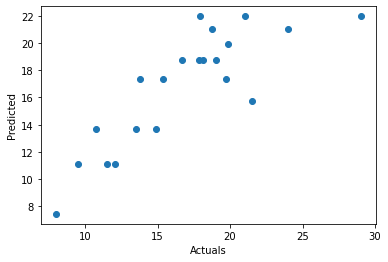

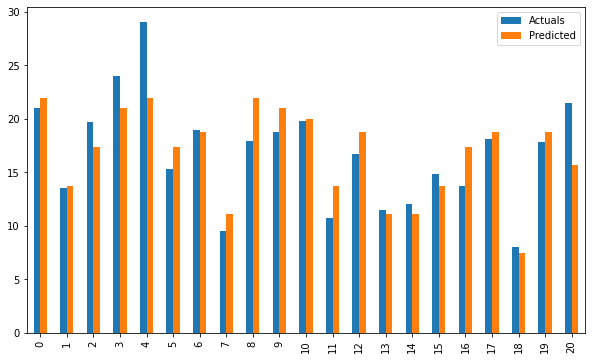

In [113]:
plt.scatter(x=res['Actuals'], y=res['Predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')
    
res.plot(kind='bar',figsize=(10,6))